Dataset complete info: 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

## Attribute information

1. buying  $\quad$     v-high, high, med, low
2. maint    $\quad$    v-high, high, med, low
3. doors      $\quad$  2, 3, 4, 5-more
4. persons    $\quad$  2, 4, more
5. lug_boot    $\quad$ small, med, big
6. safety      $\quad$ low, med, high

In [96]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
#from sklearn.

In [97]:
data='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

data=pd.read_csv(data, names=columns)

data


,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


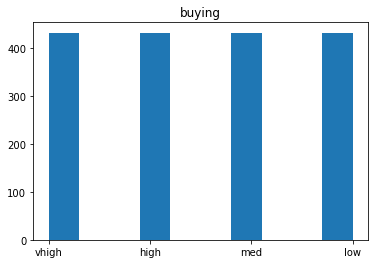

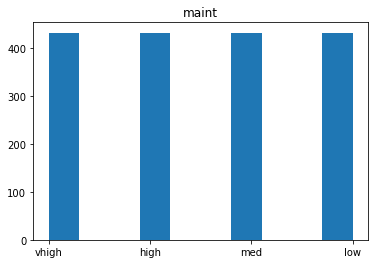

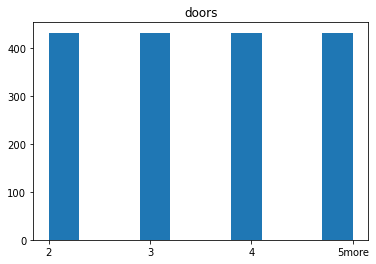

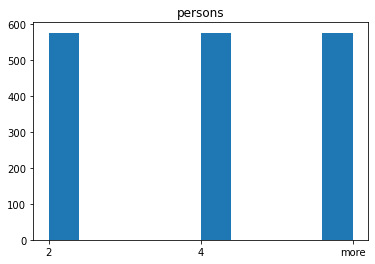

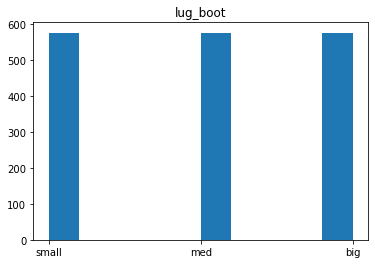

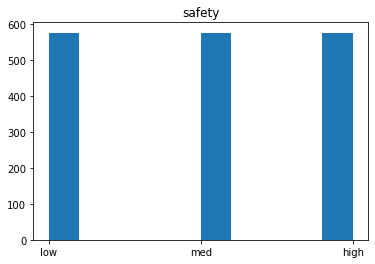

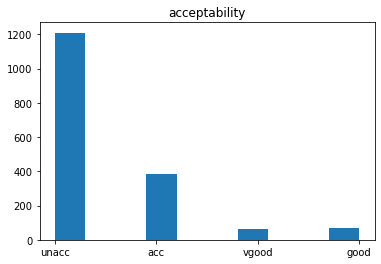

In [98]:

for col_name in data.columns:
        plt.figure()
        plt.hist(data[col_name])
        plt.title(col_name)

### Data cleaning

In [99]:
# df = data.replace({'5more': 5, 'more': 5})
# df = data.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
# df = data.replace({'big': 3, 'small': 1})
# unacc     1210     (70.023 %) 
#    acc        384     (22.222 %) 
#    good        69     ( 3.993 %) 
#    v-good      65     ( 3.762 %) 

#  doors        2, 3, 4, 5-more
# 4. persons      2, 4, more
# 5. lug_boot     small, med, big
# 6. safety       low, med, high
#v-high, high, med, low
data['buying'] = data['buying'].map({'low':0, 'med':1,'high':2, 'vhigh':3})
data['maint'] = data['maint'].map({'low':0, 'med':1,'high':2, 'vhigh':3})
data['doors']=data['doors'].map({'2':2,'3':3,'4':4,'5more':5})
data['lug_boot']=data['lug_boot'].map({'small':0,'med':1,'big':2})
data['persons'] = data['persons'].map({'2':2, '4':4,'more':5})
data['safety'] = data['safety'].map({'low':0, 'med':1,'high':2})
data['target']=data['acceptability'].map({'unacc': 0,'acc':1, 'good': 2, 'vgood' :3})


In [100]:
data

,buying,maint,doors,persons,lug_boot,safety,acceptability,target
0,3,3,2,2,0,0,unacc,0
1,3,3,2,2,0,1,unacc,0
2,3,3,2,2,0,2,unacc,0
3,3,3,2,2,1,0,unacc,0
4,3,3,2,2,1,1,unacc,0
...,...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,good,2
1724,0,0,5,5,1,2,vgood,3
1725,0,0,5,5,2,0,unacc,0
1726,0,0,5,5,2,1,good,2


In [101]:
data.dtypes

buying            int64
maint             int64
doors             int64
persons           int64
lug_boot          int64
safety            int64
acceptability    object
target            int64
dtype: object

In [102]:
X, y = data.iloc[:, :-2], data.iloc[:, -1]

In [103]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [104]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

### Displaying the tree plot

[Text(0.5960365853658537, 0.9615384615384616, 'safety <= 0.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = buying'),
 Text(0.5838414634146342, 0.8846153846153846, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = buying'),
 Text(0.6082317073170732, 0.8846153846153846, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = buying'),
 Text(0.5960365853658537, 0.8076923076923077, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = buying'),
 Text(0.6204268292682927, 0.8076923076923077, 'buying <= 1.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = doors'),
 Text(0.3201219512195122, 0.7307692307692307, 'maint <= 0.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = doors'),
 Text(0.11280487804878049, 0.6538461538461539, 'safety <= 1.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = persons'),
 Text(0.06097560975609756, 0.5769230769230769, 'lug_boot <= 0.5\ngini = 0.456\nsamples =

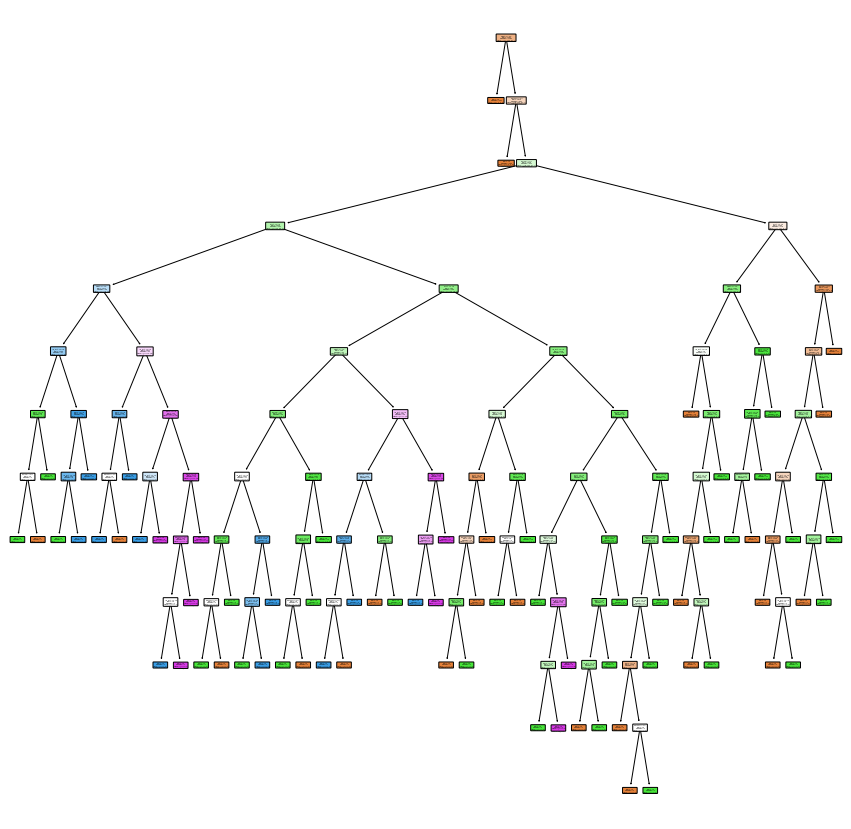

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['buying', 'doors', 'persons', 'lug_boot'],
         feature_names=X.columns)

In [64]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'acceptability', 'target'],
      dtype='object')

### Displaying the comfusion matrix

C:\Users\KINGSLEY\Anaconda3\Anaconda\envs\Strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


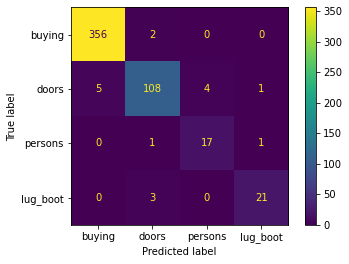

In [106]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['buying', 'doors', 'persons', 'lug_boot'])

## cross validation

In [107]:
cv = cross_validate(dt_clf,X_train,y_train,cv=5)

In [108]:
prediction=dt_clf.predict(X_test)

In [110]:
accuracy=dt_clf.score(X_train, y_train)

1.0